In [1]:
import ROOT
import numpy as np
from ROOT import TGraphErrors
from ROOT import TVectorT
import matplotlib.pyplot as plt
from matplotlib import ticker
from root_np_functions import *
from plotting_functions import *

Welcome to JupyROOT 6.18/00


In [2]:
filename_14T = "DeltaR_Histograms_Jet_Callibration_1.400000T.root"
filename = "DeltaR_Histograms_Jet_Callibration_3.000000T.root"


file = ROOT.TFile(filename)
file_14T = ROOT.TFile(filename_14T)

In [3]:
h1 = file.Get("dPhi_e_RecoJet")
h1M = file.Get("sigmamin_dPhi_e_RecoJet")
h1P = file.Get("sigmaplus_dPhi_e_RecoJet")

dPhi_bins,dPhi_centers,dPhi_widths = get_th1_binning_np(h1)
TJ_dPhi, TJ_dPhi_errors = TH1_to_numpy_wErrors(file.Get("dPhi_e_TrueJet"),True,False)
RJ_dPhi, RJ_dPhi_errors = TH1_to_numpy_wErrors(h1,True,False)

all_TJ_dPhi, all_TJ_dPhi_errors = TH1_to_numpy_wErrors(file.Get("all_dPhi_e_TrueJet"),True,False)

TJ_dPhi = TJ_dPhi/dPhi_widths
TJ_dPhi_errors = TJ_dPhi_errors/dPhi_widths
RJ_dPhi = RJ_dPhi/dPhi_widths
RJ_dPhi_errors = RJ_dPhi_errors/dPhi_widths

all_TJ_dPhi = all_TJ_dPhi/dPhi_widths
all_TJ_dPhi_errors = all_TJ_dPhi_errors/dPhi_widths

dPhi_bins,dPhi_centers,dPhi_widths = get_th1_binning_np(h1)
RJ_dPhi_M, RJ_dPhi_errors_M = TH1_to_numpy_wErrors(h1M,True,False)
RJ_dPhi_P, RJ_dPhi_errors_P = TH1_to_numpy_wErrors(h1P,True,False)

#print(RJ_dPhi_M)

h1 = file_14T.Get("dPhi_e_RecoJet")
h1M = file_14T.Get("sigmamin_dPhi_e_RecoJet")
h1P = file_14T.Get("sigmaplus_dPhi_e_RecoJet")
Tesla14_RecodPhi,Tesla14_RecodPhi_errors = TH1_to_numpy_wErrors(h1,True,False)
Tesla14_TruthdPhi,Tesla14_TruthdPhi_errors = TH1_to_numpy_wErrors(file_14T.Get("dPhi_e_TrueJet"),True,False)
Tesla14_RecodPhi_M,Tesla14_RecodPhi_errors_M = TH1_to_numpy_wErrors(h1M,True,False)
Tesla14_RecodPhi_P,Tesla14_RecodPhi_errors_P = TH1_to_numpy_wErrors(h1P,True,False)
#print(Tesla14_RecodPhi_P)

RJ_dPhi_M = RJ_dPhi_M/dPhi_widths
RJ_dPhi_errors_M = RJ_dPhi_errors_M/dPhi_widths
RJ_dPhi_P = RJ_dPhi_P/dPhi_widths
RJ_dPhi_errors_P = RJ_dPhi_errors_P/dPhi_widths

Tesla14_RecodPhi = Tesla14_RecodPhi/dPhi_widths
Tesla14_RecodPhi_M = Tesla14_RecodPhi_M/dPhi_widths
Tesla14_RecodPhi_errors_M = Tesla14_RecodPhi_errors_M/dPhi_widths
Tesla14_RecodPhi_P = Tesla14_RecodPhi_P/dPhi_widths
Tesla14_RecodPhi_errors_P = Tesla14_RecodPhi_errors_P/dPhi_widths


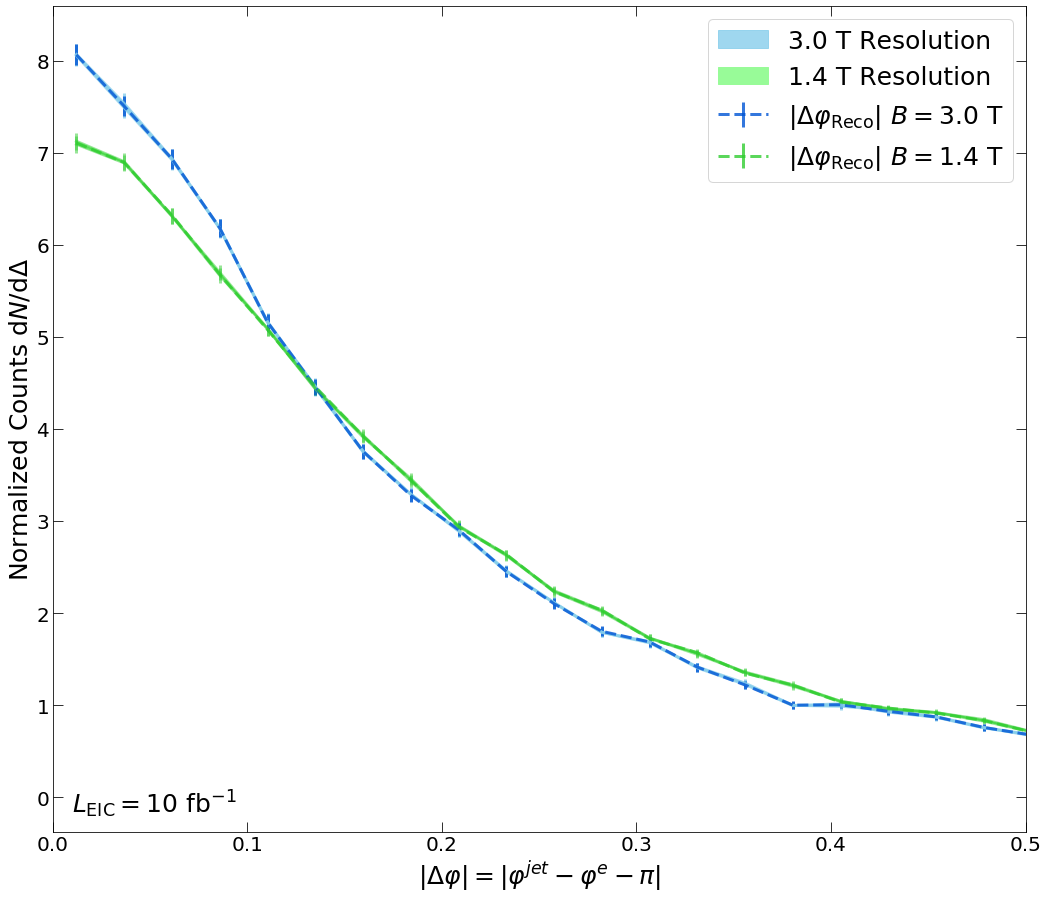

In [4]:
cool = get_colors(plt.cm.winter,4,False)
fig = plt.figure(figsize=(14,12))

#Sigma +/- plots
plt.errorbar(dPhi_centers,RJ_dPhi_M,yerr=RJ_dPhi_errors_M,
                         fmt='-',color="skyblue",linewidth=3,alpha=0.8)
                         #label=r"$|\Delta\varphi_\mathrm{Reco}|~B = 3.0$ T -" )
plt.errorbar(dPhi_centers,RJ_dPhi_P,yerr=RJ_dPhi_errors_P,
                         fmt='-',color="skyblue",linewidth=3,alpha=0.8)
                         #label=r"$|\Delta\varphi_\mathrm{Reco}|~B = 3.0$ T +" )
    
plt.errorbar(dPhi_centers,Tesla14_RecodPhi_M,yerr=Tesla14_RecodPhi_errors_M,
                         fmt='-',color="limegreen",linewidth=3,alpha=0.5)
                         #label=r"$|\Delta\varphi_\mathrm{Reco}|~B = 3.0$ T -" )
plt.errorbar(dPhi_centers,Tesla14_RecodPhi_P,yerr=Tesla14_RecodPhi_errors_P,
                         fmt='-',color="limegreen",linewidth=3,alpha=0.5)
                         #label=r"$|\Delta\varphi_\mathrm{Reco}|~B = 3.0$ T +" )

#Pretty Bands    
plt.fill_between(dPhi_centers,RJ_dPhi_M,RJ_dPhi_P,color="skyblue",alpha=0.8,label="3.0 T Resolution")

plt.fill_between(dPhi_centers,Tesla14_RecodPhi_M,Tesla14_RecodPhi_P,color="palegreen",alpha=1.0,label="1.4 T Resolution")


#Original Plots
#plt.errorbar(dPhi_centers,TJ_dPhi,yerr=TJ_dPhi_errors,
#                         fmt='-',color="darkgrey",fillstyle='none',markersize=7,linewidth=3,
 #                        label=r"$|\Delta\varphi_\mathrm{Truth}|~B = 3.0$ T" )
plt.errorbar(dPhi_centers,RJ_dPhi,yerr=RJ_dPhi_errors,
                         fmt='--',color=cool[1],linewidth=3,alpha=0.8,
                         label=r"$|\Delta\varphi_\mathrm{Reco}|~B = 3.0$ T" )

#plt.errorbar(dPhi_centers,Tesla14_TruthdPhi,yerr=Tesla14_TruthdPhi_errors,
#                         fmt='-',color=cool[2],fillstyle='none',markersize=7,linewidth=3,
#                         label=r"$|\Delta\varphi_\mathrm{Truth}|~B = 1.4$ T" )
                         #label=r"$|\varphi_{truth}^{jet} - \varphi^{e}-\pi|$")
plt.errorbar(dPhi_centers,Tesla14_RecodPhi,yerr=Tesla14_RecodPhi_errors,
                         fmt='--',color="limegreen",linewidth=3,alpha=0.8,
                         label=r"$|\Delta\varphi_\mathrm{Reco}|~B = 1.4$ T")
                         #label=r"$|\varphi_{reco}^{jet} - \varphi^{e}-\pi|$")




plt.text(.01,0.1,r'$L_\mathrm{EIC} = 10\ \mathrm{fb}^{-1}$',ha="left",va="top",size=25,alpha=1.)

plt.tight_layout()
plt.xlim(0,.5)
plt.ylabel("Normalized Counts $\mathrm{d}N/\mathrm{d}\Delta\varphi$",fontsize=25,y=0.5)
plt.xlabel(r"$|\Delta\varphi|=|\varphi^{jet} - \varphi^{e}-\pi|$",fontsize=25,x=0.5)
plt.tick_params(which='both',direction='in',right=True,top=True,bottom=True,length=10,labelsize=20)
plt.legend(fontsize=25,loc='upper right')
plt.savefig("DeltaR_Check_azimuthal_correlations.pdf")